Doing a train-test data split for the Dawson data.

In [1]:
# data testing and training
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#copy-pasting from InClass SciKitLearn Example
# columns I'm looking at from Dawson.csv: Lat, Lon, and Mammals
infile = 'Dawson data.csv'
######
jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variable, if that is what you called it, example:
jma_df.head()

,TDWG_name,TDWG_code,TDWG_L2,TDWG_continent,Country,Plants,Ants,Amphibians,Reptiles,Fish,...,GDPpcRegion,bio_1_MEAN,bio_12_MEAN,LAT,LON,mean_110_plants,completeness_ants,mean_110_amphs,mean_110_mammals,mean_110_birds
0,Alberta,71_ABT_OO,71,America_N,Canada,360.0,NaN,NaN,NaN,6.0,...,49837.0,3.259668,450.804620,55.201009,-114.470195,22.331422,100.0,66.181674,11.421278,68.001937
1,Afghanistan,34_AFG_OO,34,Asia_Temp,Afghanistan,NaN,2.0,NaN,NaN,13.0,...,561.2,116.225180,312.917212,33.838903,66.026539,14.468701,87.5,4.326592,5.429571,1.991547
2,Buenos_Aires,85_AGE_BA,85,America_S,Argentina,413.0,1.0,1.0,2.0,4.0,...,8458.0,150.388511,810.913297,-36.679745,-60.558791,13.064271,100.0,44.711250,22.640019,13.147189
3,Cordoba,85_AGE_CH,85,America_S,Argentina,60.0,NaN,0.0,1.0,0.0,...,4259.0,218.431699,937.140488,-26.397875,-60.758636,9.720421,100.0,19.469159,14.337287,3.781464
4,Chaco,85_AGE_CN,85,America_S,Argentina,100.0,1.0,0.0,0.0,0.0,...,4467.0,207.138434,1291.893573,-28.764626,-57.791853,42.037451,86.5,21.944391,10.160314,25.984013


In [3]:
# import the Dawson data file, then get columns I want for training
dawsonfile = jma_df
dawsonfilefiltered = dawsonfile[dawsonfile.Mammals>0]
X = dawsonfilefiltered[["LAT", "LON"]]
y = dawsonfilefiltered[["Mammals"]]
print(np.shape(X))
print(np.shape(y))

# split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(594, 2)
(594, 1)


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(7,15,1):
    for layers in range(7,15,1):
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=5000, random_state=4)
        mlp.fit(X_train,y_train)
        trainres = mlp.score(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test,y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved = []
    print(results)

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206]]


c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416]]


c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zollingerc\.conda\envs\IC_Assignments\Lib\site-packages\sklearn\

[[7, 7, 0.26060629881026987, 0.0805180164171555], [7, 8, 0.2736861385070771, 0.032888265475264244], [7, 9, 0.28908594407821264, -0.06825181500438005], [7, 10, 0.3166944674045066, 0.04025241501215826], [7, 11, 0.29290401813684164, 0.025058342763114028], [7, 12, 0.3490403322945571, -0.011261638312471511], [7, 13, 0.32104043793886583, 0.08326508930131593], [7, 14, 0.3121338911520867, 0.10421203990846206], [8, 7, 0.2771271782880902, 0.03456931444634859], [8, 8, 0.2696119140571973, -0.014225533291696735], [8, 9, 0.2732660235019285, -0.05683175479851288], [8, 10, 0.3090948703670543, 0.03170796726383429], [8, 11, 0.3138943569630217, 0.09949461278452976], [8, 12, 0.2891917394249175, -0.049156019678234575], [8, 13, 0.34459456537832156, 0.1346840974478869], [8, 14, 0.38031812534877285, 0.060866707933281416], [9, 7, 0.20640468281359925, 0.06123872952530962], [9, 8, 0.3500246966001932, -0.02802726026249247], [9, 9, 0.3366069733083097, 0.038250303978197175], [9, 10, 0.3877822062225922, 0.0570523453

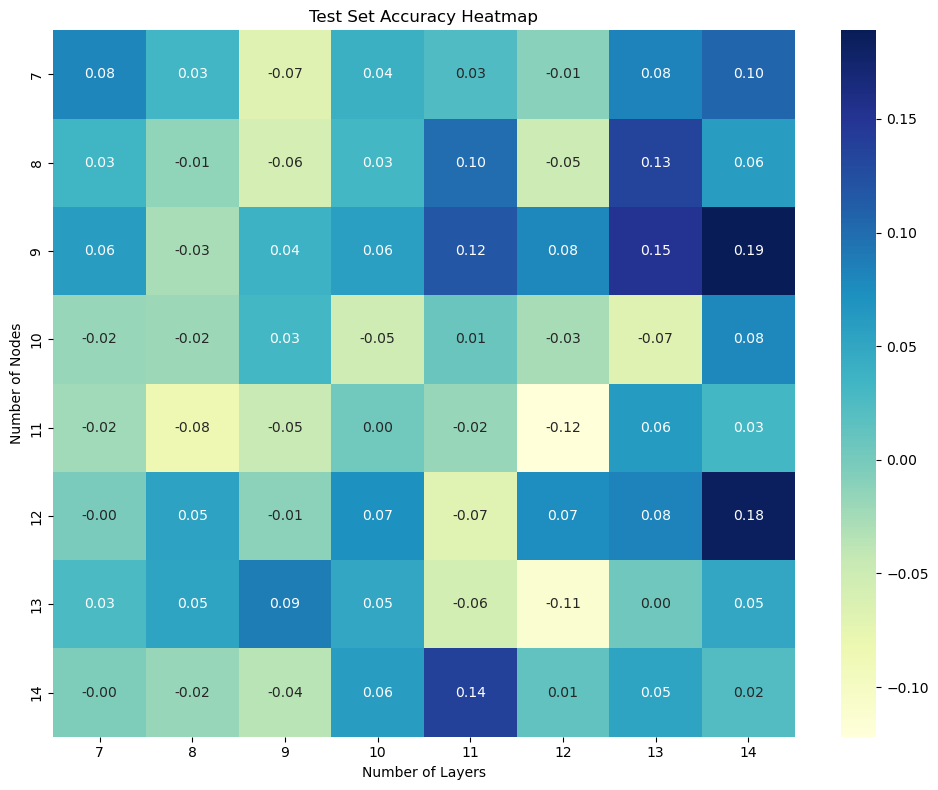

In [10]:
# make a seaborn heat map of results
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))

# build a dataframe from results and pivot so shape matches actual grid
# results entries are [nodes, layers, train_score, test_score]
res_df = pd.DataFrame(results, columns=['nodes','layers','train','test'])

# ensure nodes and layers are sorted for consistent layout
nodes_vals = np.sort(res_df['nodes'].unique())
layers_vals = np.sort(res_df['layers'].unique())

# pivot to a matrix of test scores (rows=nodes, cols=layers)
heatmap_df = res_df.pivot(index='nodes', columns='layers', values='test')

# plot
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", 
			xticklabels=layers_vals, yticklabels=nodes_vals, ax=ax)
plt.xlabel('Number of Layers') 
plt.ylabel('Number of Nodes')
plt.title('Test Set Accuracy Heatmap')
plt.tight_layout()
plt.show()

Data analysis:

Goals for 11/17

Now you should take a step back and think about your project. 

1) What was the original paper about?
    In the original paper, Arranz et. al sought to examine the effects of various environmental and human population factors on alien species richness in eight taxonomic groups at a global scale. Arranz et. al used Dawson et. al's (2017) data to create multiple types of models. Arranz et. al compared random forests and hierarchical partitioning with linear mixed effect models to unravel the individual and shared variation of environmental, economic, and human population factors with success or alien species richness in eight taxonomic groups on a global scale.

2) Did it model anything, or are you just using their data?
    Arranz. et al created several models, including univariate correlations, multiple regression, hierarchical partitioning, and two random forests. I am using the data that the authors used to create a random forest model of my own examining the relationship between environmental factors on one taxonomic group. 

3) What is your question, or idea?
    What is the relationship between latitude, longitude, and mammal alien species richness?

4) What are you specifically trying to model?
    I am going to model the relationship between latitude, longitude, and mammal alien species richness.

5) Why? How will it answer your question/idea?
    In the Arranz. et al article, the authors used random forests for classification tasks to determine the variable importance of multiple different factors on alien species richness in different taxonomic groups. For my model, I will be narrowing in on the effects of latitude and longitude on mammal alien species richness. Since I will not be looking at variable importance and I will be focusing on a count variable of mammal species rather than presence/absence, I will use a random forest model for regression.

6) What is your input data type, or structure?
    My input data type includes the latitude and longitude values.

7) What is your output data type?
    My output data type is mammal alien species richness counts.

8) What type of model have you decided to use to model your data?
    I will use a random forest model for a regression task to model the data.

9) Practical:
Have your data loaded
Plot initial data visualization
Explain your data type and input/output plans for your model
Create a train/test data split
Explain your model
Run a test using default or standard model parameters
Later this week and over the next 2 weeks we will discuss fine tuning model parameters to generate the most accurate model

10) Now that you've run the test, what are your results and what do they mean?
    The heatmap shows the accuracy of the test set when ran through different layers and nodes. The darker-shaded boxes indicate higher accuracy, while the lighter-shaded boxes indicate lower accuracy. Overall, the data is shown to be fairly accurate, with the highest accuracy found at 9 nodes and 14 layers.
